# Setup

In [10]:
import os

import numpy as np
import matplotlib.pyplot as plt
import h5py

import slab.dsfit as dsf

%matplotlib notebook

# Resonator Spectroscopy

<IPython.core.display.Javascript object>


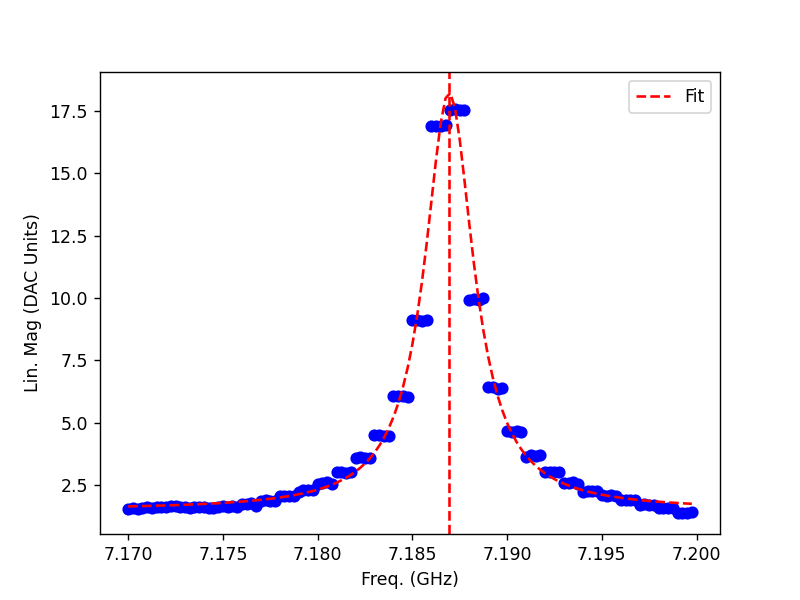

Resonator Frequency (GHz): 7.186938343066482


In [11]:
data = h5py.File('C:\\_Lib\\python\\Qick Old meas lab\\Test ZCU216 experiments\\data\\00049_res_spec.h5', 'r')

lo_freq = 7
freq = data['xpts'][0]/1e3 + lo_freq
avgq = data['avgq'][0]
avgi = data['avgi'][0]
lin_mag = np.sqrt(avgq**2 + avgi**2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(freq, lin_mag,'bo')

p = dsf.fitlor(freq, lin_mag)
ax.plot(freq, dsf.lorfunc(p, freq), c='r', linestyle='--', label="Fit")

resonator_freq = p[2]
ax.axvline(resonator_freq, linestyle='--', c='r')
print("Resonator Frequency (GHz):", resonator_freq)

ax.set_ylabel('Lin. Mag (DAC Units)')
ax.set_xlabel('Freq. (GHz)')
ax.legend()


# Qubit Spectroscopy

<IPython.core.display.Javascript object>


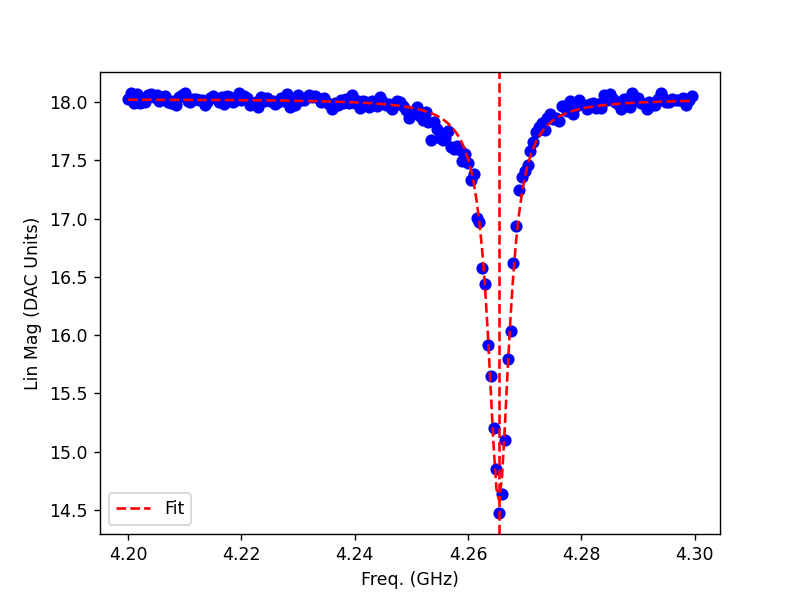

Qubit Frequency (GHz): 4.2654109669908165
Qubit HWHM (MHz): 2.2660857449209755
Pi-pulse time (expected) (us): 156.01942308921903


In [55]:
data = h5py.File('C:\\_Lib\\python\\Qick Old meas lab\\Test ZCU216 experiments\\data\\00026_qubit_spec.h5', 'r')

freq = data['xpts'][0]/1e3

avgq = data['avgq'][0]
avgi = data['avgi'][0]
lin_mag = np.sqrt(avgq**2 + avgi**2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(freq, lin_mag, 'bo')
# ax.plot(freq, avgq)
# ax.plot(freq, avgi)

p = dsf.fitlor(freq, -lin_mag)
ax.plot(freq, -dsf.lorfunc(p, freq), c='r', linestyle='--', label="Fit")

qubit_freq = p[2]
qubit_hwhm = p[3]
ax.axvline(qubit_freq, linestyle='--', c='r')
print("Qubit Frequency (GHz):", p[2])
print("Qubit HWHM (MHz):", p[3]*1e3)
print("Pi-pulse time (expected) (us):", 1/p[3]/2/np.sqrt(2))

   
ax.set_ylabel('Lin Mag (DAC Units)')
ax.set_xlabel('Freq. (GHz)')
ax.legend()



# Length Rabi

<IPython.core.display.Javascript object>


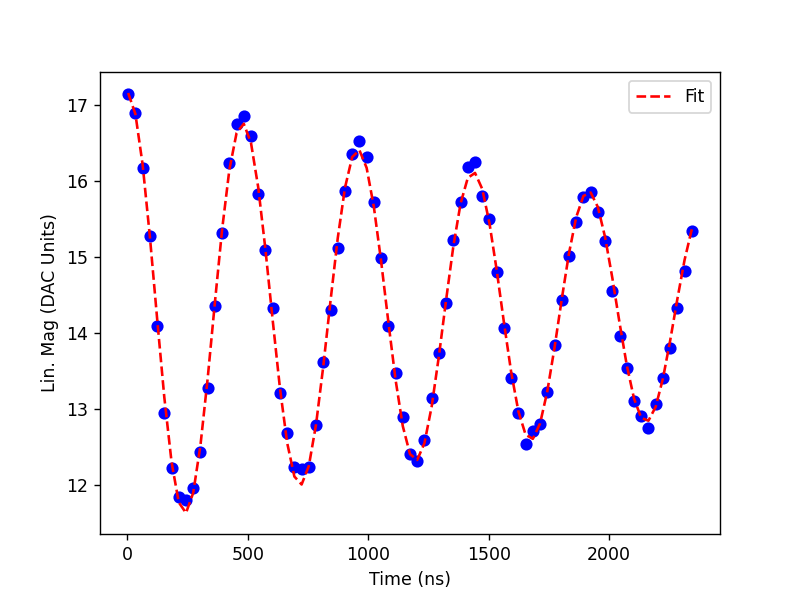

Pi-pulse time (ns): 239.33488316599076
Pi/2-pulse time (ns): 119.66744158299538


In [56]:
data = h5py.File('C:\\_Lib\\python\\Qick Old meas lab\\Test ZCU216 experiments\\data\\00029_lenrabi.h5', 'r')

time = data['xpts'][0]*1e3
avgq = data['avgq'][0]
avgi = data['avgi'][0]
lin_mag = np.sqrt(avgq**2 + avgi**2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, lin_mag,'bo')


p = dsf.fitdecaysin(time, lin_mag)
ax.plot(time, dsf.decaysin(p, time), c='r', linestyle='--', label="Fit")

t_pi = 1 / (2 * p[1])
t_half_pi = 1 / (4 * p[1])

print("Pi-pulse time (ns):", t_pi)
print("Pi/2-pulse time (ns):", t_half_pi)

ax.set_xlabel('Time (ns)')
ax.set_ylabel('Lin. Mag (DAC Units)')
ax.legend()

# Amplitude Rabi

In [6]:
result_dict = h5py.File('C:\\_Lib\\python\\Qick Old meas lab\\Test ZCU216 experiments\\data\\00006_amprabi.h5', 'r')

In [7]:
amp = result_dict['xpts'][0]
avgq = np.array(result_dict['avgq'][0])
avgi = np.array(result_dict['avgi'][0])

<IPython.core.display.Javascript object>


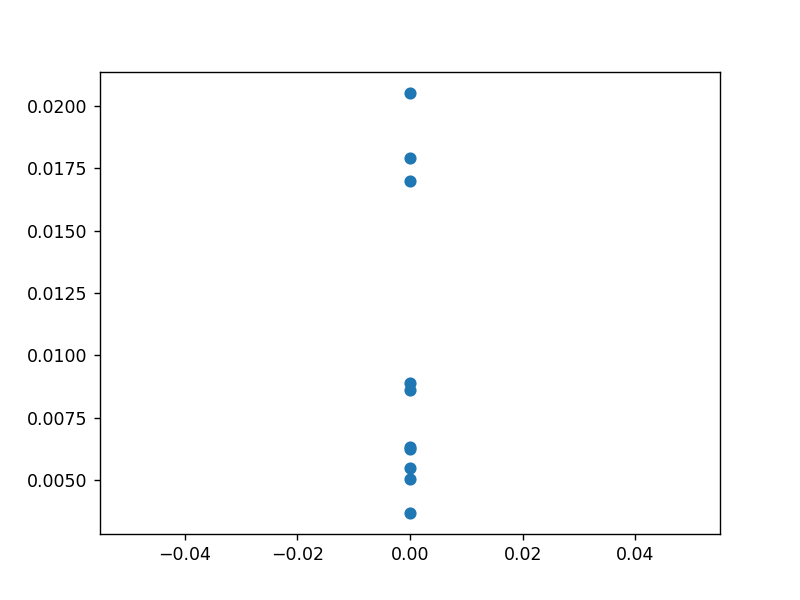

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(amp, np.sqrt(avgi**2+avgq**2))
# ax.scatter(amp, avgi)

# T1

<IPython.core.display.Javascript object>


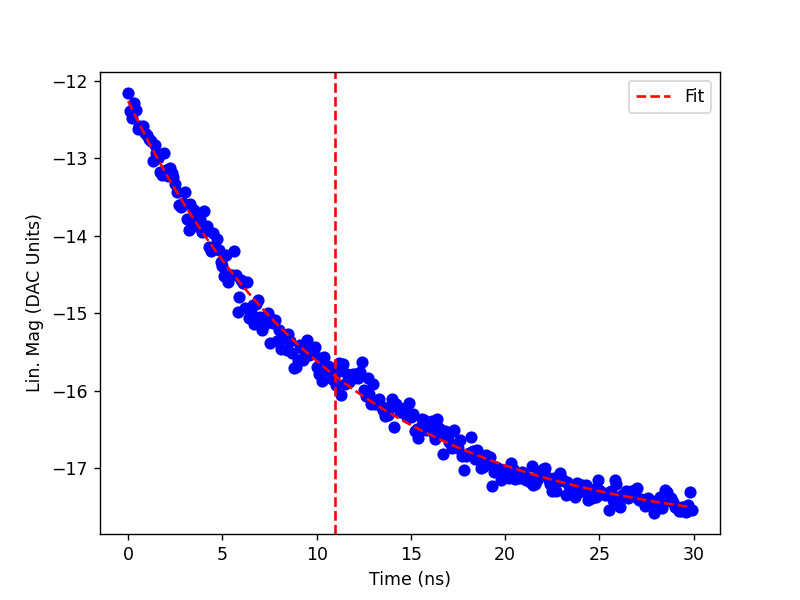

T1 (us): 10.960519127283458


In [3]:
data = h5py.File('C:\\_Lib\\python\\Qick Old meas lab\\Test ZCU216 experiments\\data\\00003_t1.h5', 'r')

time = data['xpts'][0]
avgq = data['avgq'][0]
avgi = data['avgi'][0]
lin_mag = np.sqrt(avgq**2 + avgi**2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, -lin_mag, 'bo')

p = dsf.fitexp(time, -lin_mag)
ax.plot(time, dsf.expfunc(p, time), c='r', linestyle='--', label="Fit")

t1 = p[3]
ax.axvline(t1, linestyle='--', c='r')

print("T1 (us):", p[3])

ax.set_xlabel('Time (ns)')
ax.set_ylabel('Lin. Mag (DAC Units)')
ax.legend()

# Ramsey

<IPython.core.display.Javascript object>


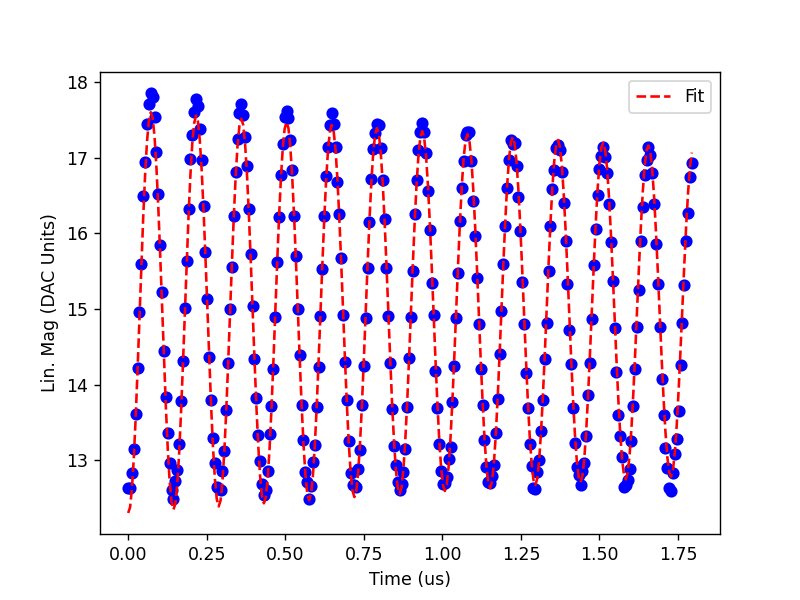

Oscillation Frequency (MHz): 6.9491975269894
T2 (us): 8.671836574193733


In [95]:
data = h5py.File('C:\\_Lib\\python\\Qick Old meas lab\\Test ZCU216 experiments\\data\\00005_ramsey.h5', 'r')

time = data['xpts'][0]
avgq = data['avgq'][0]
avgi = data['avgi'][0]
lin_mag = np.sqrt(avgq**2 + avgi**2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, lin_mag, 'bo')

ax.set_xlabel("Time (us)")
ax.set_ylabel("Lin. Mag (DAC Units)")

p = dsf.fitdecaysin(time, lin_mag)
ax.plot(time, dsf.decaysin(p, time), c='r', linestyle='--', label="Fit")

osc_freq = p[1]
t2 = p[3]

print("Oscillation Frequency (MHz):", osc_freq)
print("T2 (us):", t2)

ax.legend()

# EF Qubit Spectroscopy

<IPython.core.display.Javascript object>


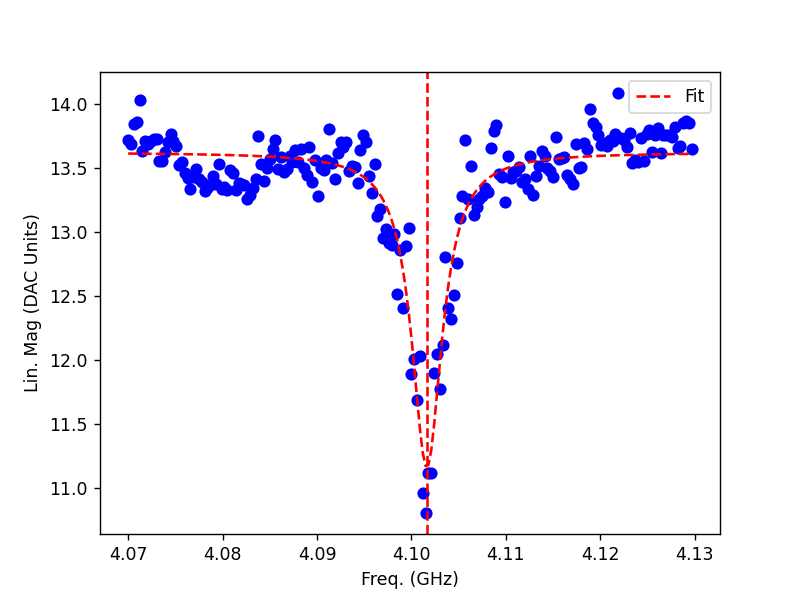

Qubit EF Frequency (GHz): 4.101630947496207
Qubit EF HWHM (MHz): 1.9500588873474298
Pi-pulse time (expected) (ns): 181.30395594063071


In [94]:
data = h5py.File('C:\\_Lib\\python\\Qick Old meas lab\\Test ZCU216 experiments\\data\\00030_qubit_spec.h5', 'r')

freq = data['xpts'][0]/1e3
avgq = data['avgq'][0]
avgi = data['avgi'][0]
lin_mag = np.sqrt(avgq**2 + avgi**2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(freq, lin_mag,'bo')

ax.set_xlabel('Freq. (GHz)')
ax.set_ylabel('Lin. Mag (DAC Units)')

p = dsf.fitlor(freq, -lin_mag)
ax.plot(freq, -dsf.lorfunc(p, freq), c='r', linestyle='--', label="Fit")

qubit_ef_freq = p[2]
qubit_ef_hwhm = p[3]

ax.axvline(qubit_ef_freq, linestyle='--', c='r')

print("Qubit EF Frequency (GHz):", p[2])
print("Qubit EF HWHM (MHz):", p[3]*1e3)
print("Pi-pulse time (expected) (ns):", 1/p[3]/2/np.sqrt(2))

ax.legend()

# Length Rabi EF

<IPython.core.display.Javascript object>


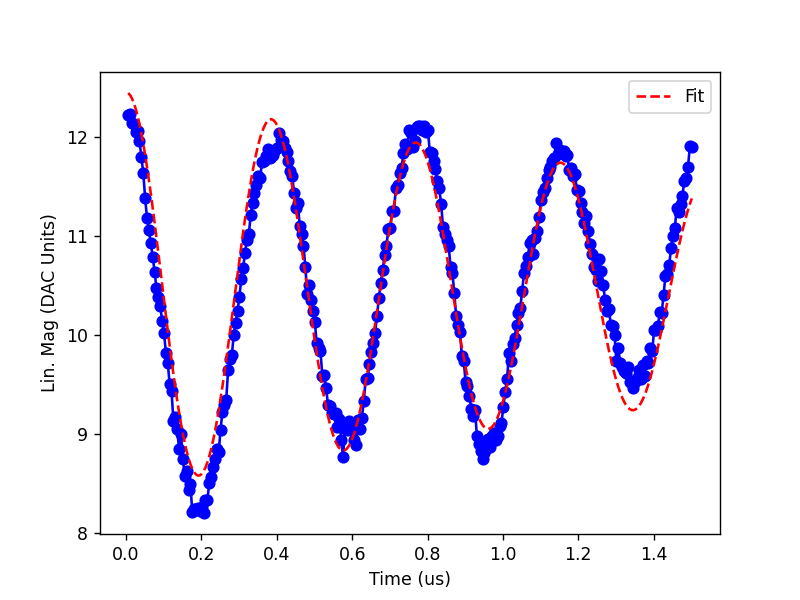

Pi-pulse time (ns): 191.97610816107903
Pi/2-pulse time (ns): 95.98805408053951


In [6]:
data = h5py.File('C:\\_Lib\\python\\Qick Old meas lab\\Test ZCU216 experiments\\data\\00013_lenrabi_ef.h5', 'r')

time = data['xpts'][0]
avgq = data['avgq'][0]
avgi = data['avgi'][0]
lin_mag = np.sqrt(avgq**2 + avgi**2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, lin_mag, 'bo-')

p = dsf.fitdecaysin(time, lin_mag)
ax.plot(time, dsf.decaysin(p, time), c='r', linestyle='--', label="Fit")

osc_freq = p[1]

time_pi = 1 / (2 * p[1])
time_half_pi = 1 / (4 * p[1])

print("Pi-pulse time (ns):", time_pi*1e3)
print("Pi/2-pulse time (ns):", time_half_pi*1e3)

ax.set_xlabel('Time (us)')
ax.set_ylabel('Lin. Mag (DAC Units)')
ax.legend()

# Qubit temperature using Length Rabi

In [16]:
def temperature_q(nu, rat):
            Kb = 1.38e-23
            h = 2 * np.pi * 1.054e-34
            return h * nu / (Kb * np.log(1 / rat))

def occupation_q(nu, T):
    Kb = 1.38e-23
    h = 2 * np.pi * 1.054e-34
    return 1 / (np.exp(h * nu / (Kb * T)) + 1)

<IPython.core.display.Javascript object>


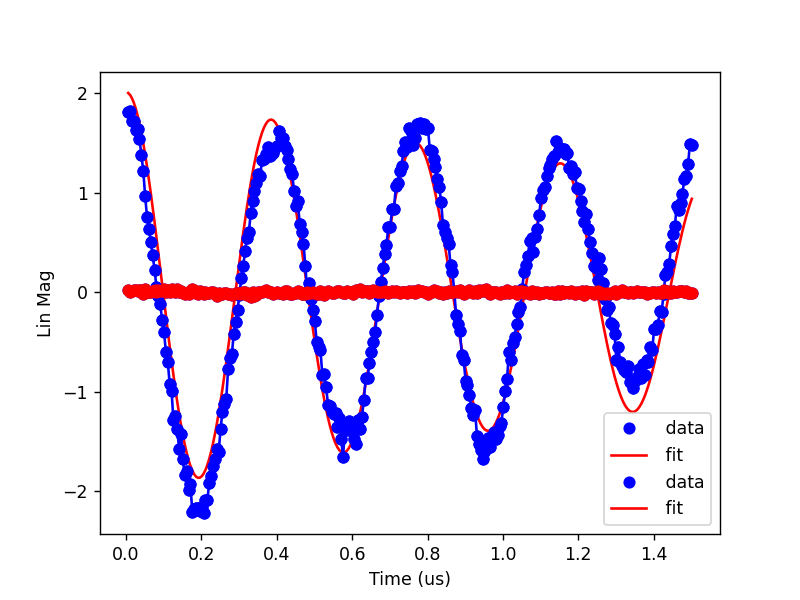

ge contrast ratio from I data =  0.009222760667290492
Qubit Temp: 43.67678366664303  mK
Qubit Excited State Occupation: 0.00913847866569366


In [19]:
result_dict = h5py.File('C:\\_Lib\\python\\Qick Old meas lab\\Test ZCU216 experiments\\data\\00012_lenrabi_ef.h5', 'r')

avgq = result_dict['avgq'][0]
avgi = result_dict['avgi'][0]
mag_nopi = np.sqrt(avgq**2 + avgi**2)
mag_nopi = mag_nopi-np.mean(mag_nopi)
time_pts = result_dict['xpts'][0]

result_dict = h5py.File('C:\\_Lib\\python\\Qick Old meas lab\\Test ZCU216 experiments\\data\\00013_lenrabi_ef.h5', 'r')

avgq = result_dict['avgq'][0]
avgi = result_dict['avgi'][0]
mag_pi = np.sqrt(avgq**2 + avgi**2)
mag_pi = mag_pi-np.mean(mag_pi)

fig = plt.figure()
ax = fig.add_subplot(111)

time_pts = result_dict['xpts'][0]

p1 = dsf.fitdecaysin(time_pts, mag_pi, showfit=True)
p2 = dsf.fitdecaysin(time_pts, mag_nopi, showfit=True)


ax.plot(time_pts, mag_pi, 'bo-')
ax.plot(time_pts, mag_nopi, 'ro-')

nu_q = 4265

ratio = abs(p2[0] / p1[0])
print("ge contrast ratio from I data = ", ratio)
print("Qubit Temp:", 1e3 * temperature_q(nu_q * 1e6, ratio), " mK")
print("Qubit Excited State Occupation:", occupation_q(nu_q, temperature_q(nu_q, ratio)))

# p = fitdecaysin(time_pts, mag, showfit=True)
# t_pi = 1 / (2 * p[1])
# t_half_pi = 1 / (4 * p[1])

# print("Pi-pulse time:", t_pi)

ax.set_ylabel('Lin Mag')
ax.set_xlabel('Time (us)')
# ax.set_ylim(-0.1,0.1)
ax.legend()

# Qubit Temperature

In [3]:
from CL_multimode_experiments.qubit_temperature import *

In [4]:
path_to_parent = r'C:\_Lib\python\Qick Old meas lab\Test ZCU216 experiments'
qubit_temp = QubitTemperatureExperiment(path=path_to_parent,config_file='config_new.json')
qubit_temp.cfg.expt={
       "start": 3000,  # in mic sec
       "step": 50, 
       "expts": 100, 
       "reps": 1000,
       "rounds": 1,
       "sigma_test": .2,
       "ge_pi_after": False,
       "rounds_without_pi_first":False,
       "pi_qubit":True}  # "rounds" key

C:\_Lib\python\Qick Old meas lab\Test ZCU216 experiments test0
config_new.json test
C:\_Lib\python\Qick Old meas lab\Test ZCU216 experiments\config_new.json test1
{'device': {'soc': {'resonator': {'ch': 4, 'nyqist': 1, 'res_phase': 0, 'gain': 1000, 'freq': 186.941860258892, 'phase': 0}, 'readout': {'ch': [0], 'nyqist': 1, 'length': 5, 'readout_length': 5, 'adc_trig_offset': 60, 'relax_delay': 50, 'freq': 186.941860258892, 'phase': 0}, 'qubit': {'ch': 6, 'nyqist': 1, 'f_ge': 4265.424523771228, 'f_ef': 4101.630947496188, 'pulses': {'pi_ge': {'gain': 2400, 'sigma': 0.2393}, 'pi2_ge': {'gain': 2400, 'sigma': 0.11965}}}}}, 'aliases': {'soc': 'myqick'}} test2


In [5]:
mxg1.set_output(state=True)
result_dict = qubit_temp.acquire(progress=True)
mxg1.set_output(state=False)

  0%|          | 0/100000 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Readout IQ Histogram

<IPython.core.display.Javascript object>


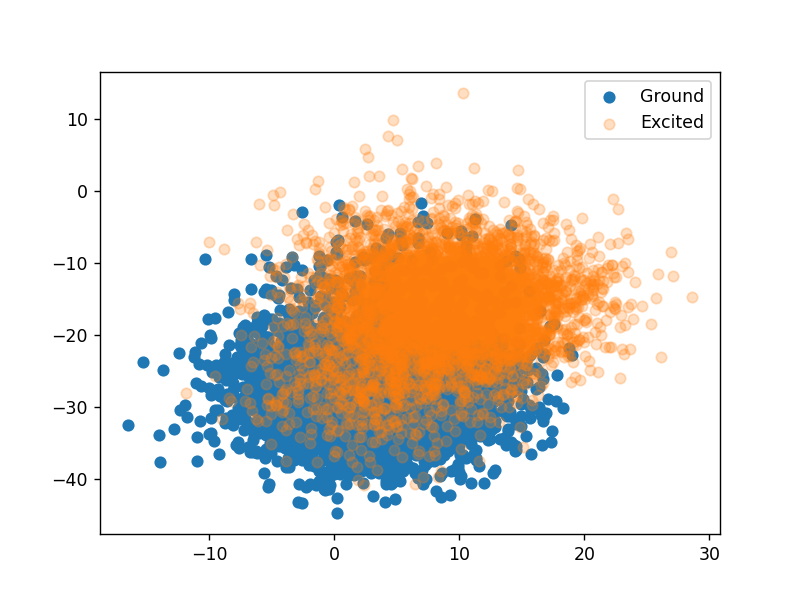

In [58]:
q_0 = result_dict['q0'][0]
i_0 = result_dict['i0'][0]

q_1 = result_dict['q0'][1]
i_1 = result_dict['i0'][1]

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(i_0, q_0, label="Ground")
ax.scatter(i_1, q_1, label="Excited", alpha=.25)
ax.legend()

In [29]:
data = [i_0, q_0, i_1, q_1]

<IPython.core.display.Javascript object>


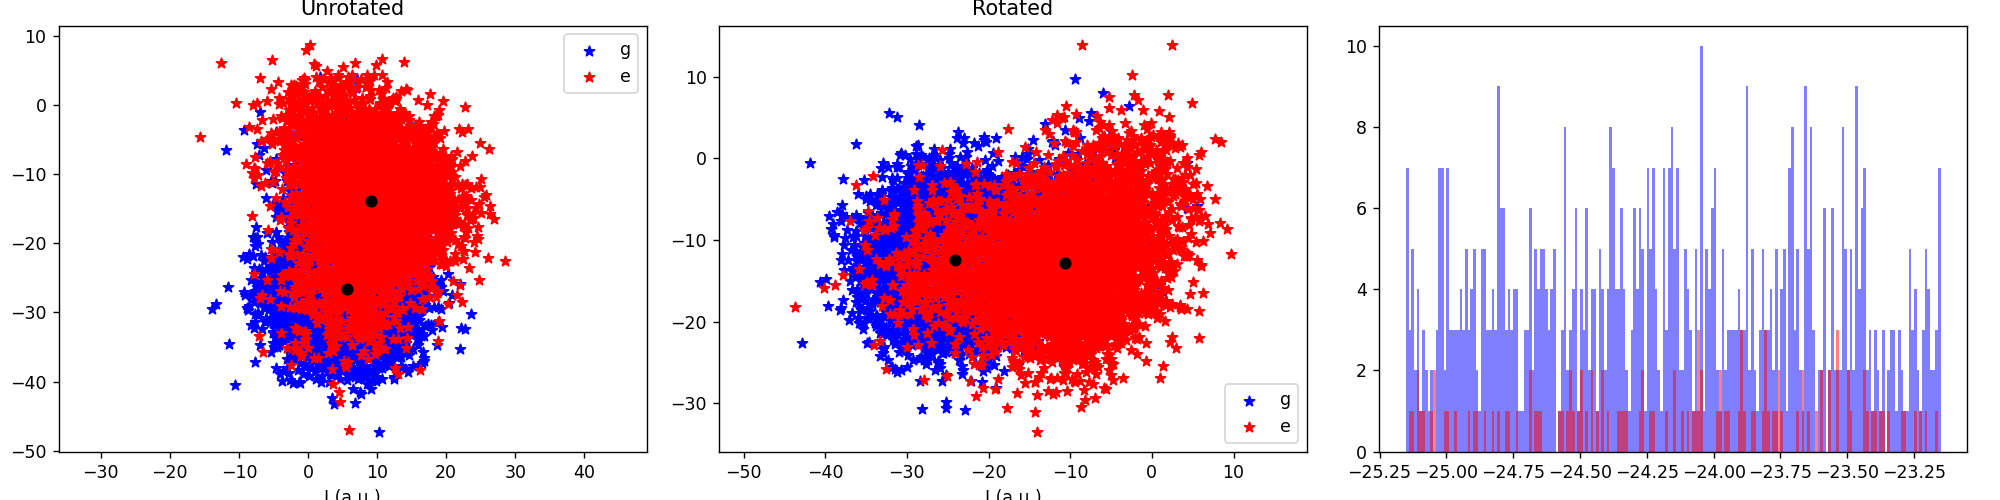

In [30]:
calc = iq_hist.hist(data)

0.7002


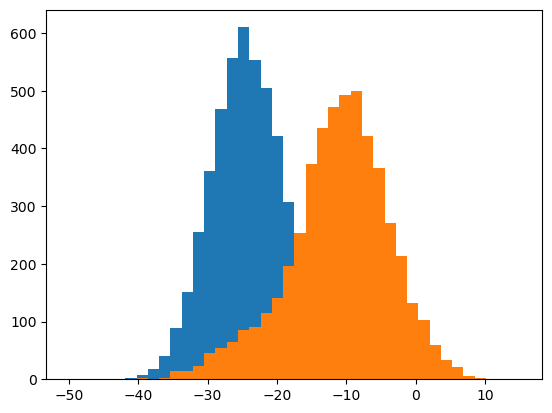

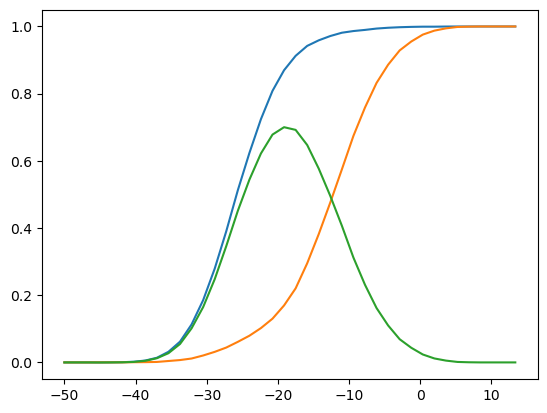

In [154]:
ig_new = calc[3]
qg_new = calc[4]
ie_new = calc[5]

fig = plt.figure()
ax = fig.add_subplot()
n_g = ax.hist(ig_new, bins=40, range=(-50,15))
n_e = ax.hist(ie_new, bins=40, range=(-50,15))

cumsum_g = np.cumsum(n_g[0])
cumsum_e = np.cumsum(n_e[0])

norm = 0.5 * np.sum(n_g[0]) + 0.5 * np.sum(n_e[0])

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(n_g[1][:-1], cumsum_g/norm)
ax.plot(n_e[1][:-1], cumsum_e/norm)

diff = cumsum_g - cumsum_e
ax.plot(n_g[1][:-1], diff/norm)

print(np.max(diff/norm))

In [9]:
def iq_sweep(exp_inst, length_list, freq_list, power_list):
    '''
    exp_inst = instance of experiment class
    length_list = list of readout length to sweep over
    
    Returns readout_fid, data_raw
    
    data_raw[n][l][m] = [q_g, i_g, q_e, i_e]
    '''
    
    data_raw = []
    readout_fid = []
    
    for i in length_list:
        
        data_raw_length = []
        readout_fid_length = []
        
        exp_inst.cfg.device.soc.readout.readout_length = i
        
        for j in freq_list:
            
            data_raw_power = []
            readout_fid_power = []
            
            exp_inst.cfg.device.soc.resonator.freq = j
            exp_inst.cfg.device.soc.readout.freq = j
            
            for k in power_list:
                
                exp_inst.cfg.device.soc.resonator.gain = k
                
                result_dict = exp_inst.acquire(progress=True)                
                data_raw_temp = [result_dict['q0'][0], result_dict['i0'][0], result_dict['q0'][1], result_dict['i0'][1]]
                calc = exp_inst.hist(data_raw_temp, plot=False)
                fid = readout_fid([calc[3], calc[5]])
            
                readout_fid_power.append(fid)
                data_raw_power.append(data_raw_temp)
            
            data_raw.append(data_raw_power)
            readout_fid.append(readout_fid_power)
    return data_raw, readout_fid

def readout_fid(data):
    i_g = data[0]
    i_e = data[1]
    minimum = np.min([np.min(i_g), np.min(i_e)])
    maximum = np.max([np.max(i_g), np.max(i_e)])
    
#     fig = plt.figure()
#     ax = fig.add_subplot()
    
    n_g = plt.hist(i_g, bins=40, range=(minimum, maximum))
    n_e = plt.hist(i_e, bins=40, range=(minimum, maximum))
    
    cumsum_g = np.cumsum(n_g[0])
    cumsum_e = np.cumsum(n_e[0])
    
    norm = 0.5 * np.sum(n_g[0]) + 0.5 * np.sum(n_e[0])
    
    diff = np.abs(cumsum_g - cumsum_e)
    
    readout_fid = np.max(diff/norm)
    
#     fig = plt.figure()
#     ax = fig.add_subplot()
#     ax.plot(n_g[1][:-1], cumsum_g/norm)
#     ax.plot(n_e[1][:-1], cumsum_e/norm)
    
    print(readout_fid)
    
    return readout_fid

freq = np.linspace(180, 190, 50)
power = np.linspace(100, 12000, 50, dtype=int)

In [ ]:
mxg1.set_output(state=True)
data = iq_sweep(freq, power)
mxg1.set_output(state=False)

C:\_Lib\python\Qick Old meas lab\Test ZCU216 experiments test0
config_new.json test
C:\_Lib\python\Qick Old meas lab\Test ZCU216 experiments\config_new.json test1
{'device': {'soc': {'resonator': {'ch': 4, 'nyqist': 1, 'res_phase': 0, 'gain': 2000, 'freq': 186.941860258892, 'phase': 0}, 'readout': {'ch': [0], 'nyqist': 1, 'length': 5, 'readout_length': 1, 'adc_trig_offset': 60, 'relax_delay': 50, 'freq': 186.941860258892, 'phase': 0}, 'qubit': {'ch': 6, 'nyqist': 1, 'f_ge': 4265.424523771228, 'f_ef': 4101.630947496188, 'pulses': {'pi_ge': {'gain': 2400, 'sigma': 0.2393}, 'pi2_ge': {'gain': 2400, 'sigma': 0.11965}}}}}, 'aliases': {'soc': 'myqick'}} test2


  0%|          | 0/6000 [00:00<?, ?it/s]

0.016666666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.014


  0%|          | 0/6000 [00:00<?, ?it/s]

0.011


  0%|          | 0/6000 [00:00<?, ?it/s]

0.045


  0%|          | 0/6000 [00:00<?, ?it/s]

0.03766666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.035666666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.043666666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.061


  0%|          | 0/6000 [00:00<?, ?it/s]

0.07833333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.055


  0%|          | 0/6000 [00:00<?, ?it/s]

0.06633333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.082


  0%|          | 0/6000 [00:00<?, ?it/s]

0.11433333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.08366666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.1


  0%|          | 0/6000 [00:00<?, ?it/s]

0.08466666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.109


  0%|          | 0/6000 [00:00<?, ?it/s]

0.12633333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.12933333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.172


  0%|          | 0/6000 [00:00<?, ?it/s]

0.17666666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.21


  0%|          | 0/6000 [00:00<?, ?it/s]

0.274


  0%|          | 0/6000 [00:00<?, ?it/s]

0.462


  0%|          | 0/6000 [00:00<?, ?it/s]

0.6133333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.616


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7133333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.757


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7713333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.774


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7856666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7936666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8086666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7833333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.811


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7873333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.757


  0%|          | 0/6000 [00:00<?, ?it/s]

0.761


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7243333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.581


  0%|          | 0/6000 [00:00<?, ?it/s]

0.37866666666666665


  0%|          | 0/6000 [00:00<?, ?it/s]

0.191


  0%|          | 0/6000 [00:00<?, ?it/s]

0.09233333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.091


  0%|          | 0/6000 [00:00<?, ?it/s]

0.097


  0%|          | 0/6000 [00:00<?, ?it/s]

0.10633333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.07033333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.08466666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.079


  0%|          | 0/6000 [00:00<?, ?it/s]

0.08566666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.026


  0%|          | 0/6000 [00:00<?, ?it/s]

0.024


  0%|          | 0/6000 [00:00<?, ?it/s]

0.033


  0%|          | 0/6000 [00:00<?, ?it/s]

0.022


  0%|          | 0/6000 [00:00<?, ?it/s]

0.043333333333333335


  0%|          | 0/6000 [00:00<?, ?it/s]

0.045


  0%|          | 0/6000 [00:00<?, ?it/s]

0.08633333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.076


  0%|          | 0/6000 [00:00<?, ?it/s]

0.07866666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.082


  0%|          | 0/6000 [00:00<?, ?it/s]

0.08733333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.081


  0%|          | 0/6000 [00:00<?, ?it/s]

0.11066666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.11066666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.125


  0%|          | 0/6000 [00:00<?, ?it/s]

0.12033333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.16066666666666668


  0%|          | 0/6000 [00:00<?, ?it/s]

0.14633333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.16433333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.19233333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.221


  0%|          | 0/6000 [00:00<?, ?it/s]

0.271


  0%|          | 0/6000 [00:00<?, ?it/s]

0.48


  0%|          | 0/6000 [00:00<?, ?it/s]

0.6146666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7156666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.728


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7743333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8003333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7973333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8143333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8013333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.814


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8073333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.807


  0%|          | 0/6000 [00:00<?, ?it/s]

0.802


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7823333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7593333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7273333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.6156666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.37133333333333335


  0%|          | 0/6000 [00:00<?, ?it/s]

0.18566666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.103


  0%|          | 0/6000 [00:00<?, ?it/s]

0.08433333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.086


  0%|          | 0/6000 [00:00<?, ?it/s]

0.09233333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.06466666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.08466666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.084


  0%|          | 0/6000 [00:00<?, ?it/s]

0.11433333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.09666666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.027333333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.02266666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.034333333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.050333333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.036


  0%|          | 0/6000 [00:00<?, ?it/s]

0.04833333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.06233333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.07266666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.06933333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.062


  0%|          | 0/6000 [00:00<?, ?it/s]

0.08466666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.10666666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.11866666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.129


  0%|          | 0/6000 [00:00<?, ?it/s]

0.12866666666666668


  0%|          | 0/6000 [00:00<?, ?it/s]

0.13466666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.13133333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.16433333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.202


  0%|          | 0/6000 [00:00<?, ?it/s]

0.22366666666666668


  0%|          | 0/6000 [00:00<?, ?it/s]

0.29


  0%|          | 0/6000 [00:00<?, ?it/s]

0.35533333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.579


  0%|          | 0/6000 [00:00<?, ?it/s]

0.6156666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7213333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7726666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8033333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.802


  0%|          | 0/6000 [00:00<?, ?it/s]

0.797


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8106666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8043333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8213333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8176666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8006666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.808


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7773333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.703


  0%|          | 0/6000 [00:00<?, ?it/s]

0.5646666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.3383333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.154


  0%|          | 0/6000 [00:00<?, ?it/s]

0.08366666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.10233333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.09433333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.07333333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.07766666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.092


  0%|          | 0/6000 [00:00<?, ?it/s]

0.07566666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.108


  0%|          | 0/6000 [00:00<?, ?it/s]

0.10766666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.09766666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.012666666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.016666666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.036333333333333336


  0%|          | 0/6000 [00:00<?, ?it/s]

0.033666666666666664


  0%|          | 0/6000 [00:00<?, ?it/s]

0.045


  0%|          | 0/6000 [00:00<?, ?it/s]

0.05266666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.046


  0%|          | 0/6000 [00:00<?, ?it/s]

0.07633333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.10133333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.09466666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.11266666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.11333333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.104


  0%|          | 0/6000 [00:00<?, ?it/s]

0.125


  0%|          | 0/6000 [00:00<?, ?it/s]

0.15266666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.12366666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.168


  0%|          | 0/6000 [00:00<?, ?it/s]

0.19033333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.192


  0%|          | 0/6000 [00:00<?, ?it/s]

0.248


  0%|          | 0/6000 [00:00<?, ?it/s]

0.3416666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.461


  0%|          | 0/6000 [00:00<?, ?it/s]

0.662


  0%|          | 0/6000 [00:00<?, ?it/s]

0.733


  0%|          | 0/6000 [00:00<?, ?it/s]

0.785


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8186666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8056666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.811


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8153333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.82


  0%|          | 0/6000 [00:00<?, ?it/s]

0.817


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8243333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8176666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7886666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7666666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7136666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.546


  0%|          | 0/6000 [00:00<?, ?it/s]

0.2836666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.134


  0%|          | 0/6000 [00:00<?, ?it/s]

0.095


  0%|          | 0/6000 [00:00<?, ?it/s]

0.11066666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.08


  0%|          | 0/6000 [00:00<?, ?it/s]

0.07866666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.083


  0%|          | 0/6000 [00:00<?, ?it/s]

0.099


  0%|          | 0/6000 [00:00<?, ?it/s]

0.08333333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.13633333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.09866666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.11233333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.136


  0%|          | 0/6000 [00:00<?, ?it/s]

0.025333333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.020666666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.05733333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.043666666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.076


  0%|          | 0/6000 [00:00<?, ?it/s]

0.064


  0%|          | 0/6000 [00:00<?, ?it/s]

0.06933333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.097


  0%|          | 0/6000 [00:00<?, ?it/s]

0.07133333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.08466666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.136


  0%|          | 0/6000 [00:00<?, ?it/s]

0.10633333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.108


  0%|          | 0/6000 [00:00<?, ?it/s]

0.13566666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.154


  0%|          | 0/6000 [00:00<?, ?it/s]

0.13866666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.17633333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.20266666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.22166666666666668


  0%|          | 0/6000 [00:00<?, ?it/s]

0.2916666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.3993333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.623


  0%|          | 0/6000 [00:00<?, ?it/s]

0.6856666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7816666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8113333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8146666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8116666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.806


  0%|          | 0/6000 [00:00<?, ?it/s]

0.823


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8276666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8106666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7973333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7956666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7613333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.705


  0%|          | 0/6000 [00:00<?, ?it/s]

0.49933333333333335


  0%|          | 0/6000 [00:00<?, ?it/s]

0.25333333333333335


  0%|          | 0/6000 [00:00<?, ?it/s]

0.116


  0%|          | 0/6000 [00:00<?, ?it/s]

0.09966666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.11766666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.07933333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.07233333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.07366666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.07733333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.11466666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.10833333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.11066666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.12


  0%|          | 0/6000 [00:00<?, ?it/s]

0.13333333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.14233333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.015333333333333332


  0%|          | 0/6000 [00:00<?, ?it/s]

0.03


  0%|          | 0/6000 [00:00<?, ?it/s]

0.042333333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.035


  0%|          | 0/6000 [00:00<?, ?it/s]

0.05566666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.06666666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.09666666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.06633333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.086


  0%|          | 0/6000 [00:00<?, ?it/s]

0.10233333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.10666666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.13466666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.13466666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.15166666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.159


  0%|          | 0/6000 [00:00<?, ?it/s]

0.146


  0%|          | 0/6000 [00:00<?, ?it/s]

0.194


  0%|          | 0/6000 [00:00<?, ?it/s]

0.218


  0%|          | 0/6000 [00:00<?, ?it/s]

0.2816666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.4056666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.573


  0%|          | 0/6000 [00:00<?, ?it/s]

0.706


  0%|          | 0/6000 [00:00<?, ?it/s]

0.798


  0%|          | 0/6000 [00:00<?, ?it/s]

0.811


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8153333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8133333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8116666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8033333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8016666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8216666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8006666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7756666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7533333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.6453333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.4603333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.22


  0%|          | 0/6000 [00:00<?, ?it/s]

0.10366666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.105


  0%|          | 0/6000 [00:00<?, ?it/s]

0.10266666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.10033333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.089


  0%|          | 0/6000 [00:00<?, ?it/s]

0.112


  0%|          | 0/6000 [00:00<?, ?it/s]

0.103


  0%|          | 0/6000 [00:00<?, ?it/s]

0.12733333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.106


  0%|          | 0/6000 [00:00<?, ?it/s]

0.13933333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.12766666666666668


  0%|          | 0/6000 [00:00<?, ?it/s]

0.11233333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.16366666666666665


  0%|          | 0/6000 [00:00<?, ?it/s]

0.16366666666666665


  0%|          | 0/6000 [00:00<?, ?it/s]

0.012


  0%|          | 0/6000 [00:00<?, ?it/s]

0.019


  0%|          | 0/6000 [00:00<?, ?it/s]

0.041666666666666664


  0%|          | 0/6000 [00:00<?, ?it/s]

0.048


  0%|          | 0/6000 [00:00<?, ?it/s]

0.049


  0%|          | 0/6000 [00:00<?, ?it/s]

0.052


  0%|          | 0/6000 [00:00<?, ?it/s]

0.068


  0%|          | 0/6000 [00:00<?, ?it/s]

0.117


  0%|          | 0/6000 [00:00<?, ?it/s]

0.107


  0%|          | 0/6000 [00:00<?, ?it/s]

0.126


  0%|          | 0/6000 [00:00<?, ?it/s]

0.105


  0%|          | 0/6000 [00:00<?, ?it/s]

0.13466666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.15133333333333332


  0%|          | 0/6000 [00:00<?, ?it/s]

0.155


  0%|          | 0/6000 [00:00<?, ?it/s]

0.155


  0%|          | 0/6000 [00:00<?, ?it/s]

0.198


  0%|          | 0/6000 [00:00<?, ?it/s]

0.19466666666666665


  0%|          | 0/6000 [00:00<?, ?it/s]

0.232


  0%|          | 0/6000 [00:00<?, ?it/s]

0.3463333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.6136666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.71


  0%|          | 0/6000 [00:00<?, ?it/s]

0.739


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7813333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7773333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7763333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8


  0%|          | 0/6000 [00:00<?, ?it/s]

0.826


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8083333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8086666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.787


  0%|          | 0/6000 [00:00<?, ?it/s]

0.739


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7383333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.6883333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.44533333333333336


  0%|          | 0/6000 [00:00<?, ?it/s]

0.186


  0%|          | 0/6000 [00:00<?, ?it/s]

0.139


  0%|          | 0/6000 [00:00<?, ?it/s]

0.13333333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.115


  0%|          | 0/6000 [00:00<?, ?it/s]

0.092


  0%|          | 0/6000 [00:00<?, ?it/s]

0.096


  0%|          | 0/6000 [00:00<?, ?it/s]

0.12733333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.093


  0%|          | 0/6000 [00:00<?, ?it/s]

0.127


  0%|          | 0/6000 [00:00<?, ?it/s]

0.10766666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.12166666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.16233333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.149


  0%|          | 0/6000 [00:00<?, ?it/s]

0.19566666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.17033333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.169


  0%|          | 0/6000 [00:00<?, ?it/s]

0.03266666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.036


  0%|          | 0/6000 [00:00<?, ?it/s]

0.044333333333333336


  0%|          | 0/6000 [00:00<?, ?it/s]

0.034


  0%|          | 0/6000 [00:00<?, ?it/s]

0.052333333333333336


  0%|          | 0/6000 [00:00<?, ?it/s]

0.07966666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.07733333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.07633333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.13766666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.121


  0%|          | 0/6000 [00:00<?, ?it/s]

0.12533333333333332


  0%|          | 0/6000 [00:00<?, ?it/s]

0.14866666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.18733333333333332


  0%|          | 0/6000 [00:00<?, ?it/s]

0.17433333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.15533333333333332


  0%|          | 0/6000 [00:00<?, ?it/s]

0.16566666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.21733333333333332


  0%|          | 0/6000 [00:00<?, ?it/s]

0.30233333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.45866666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.6193333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.768


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7766666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.816


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7916666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8103333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.805


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8146666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.803


  0%|          | 0/6000 [00:00<?, ?it/s]

0.79


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7666666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.752


  0%|          | 0/6000 [00:00<?, ?it/s]

0.602


  0%|          | 0/6000 [00:00<?, ?it/s]

0.39866666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.22066666666666668


  0%|          | 0/6000 [00:00<?, ?it/s]

0.129


  0%|          | 0/6000 [00:00<?, ?it/s]

0.15066666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.117


  0%|          | 0/6000 [00:00<?, ?it/s]

0.11566666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.11633333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.11066666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.124


  0%|          | 0/6000 [00:00<?, ?it/s]

0.11533333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.141


  0%|          | 0/6000 [00:00<?, ?it/s]

0.13866666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.14466666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.16566666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.174


  0%|          | 0/6000 [00:00<?, ?it/s]

0.17366666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.19933333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.18166666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.025333333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.025


  0%|          | 0/6000 [00:00<?, ?it/s]

0.025666666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.06733333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.06166666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.081


  0%|          | 0/6000 [00:00<?, ?it/s]

0.078


  0%|          | 0/6000 [00:00<?, ?it/s]

0.11266666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.123


  0%|          | 0/6000 [00:00<?, ?it/s]

0.109


  0%|          | 0/6000 [00:00<?, ?it/s]

0.15366666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.139


  0%|          | 0/6000 [00:00<?, ?it/s]

0.16666666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.183


  0%|          | 0/6000 [00:00<?, ?it/s]

0.19


  0%|          | 0/6000 [00:00<?, ?it/s]

0.195


  0%|          | 0/6000 [00:00<?, ?it/s]

0.21366666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.386


  0%|          | 0/6000 [00:00<?, ?it/s]

0.5513333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7483333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.806


  0%|          | 0/6000 [00:00<?, ?it/s]

0.819


  0%|          | 0/6000 [00:00<?, ?it/s]

0.82


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8033333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8213333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.811


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7876666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8036666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7826666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.725


  0%|          | 0/6000 [00:00<?, ?it/s]

0.6296666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.3273333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.17266666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.163


  0%|          | 0/6000 [00:00<?, ?it/s]

0.12433333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.12366666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.14133333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.10566666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.112


  0%|          | 0/6000 [00:00<?, ?it/s]

0.11266666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.114


  0%|          | 0/6000 [00:00<?, ?it/s]

0.14


  0%|          | 0/6000 [00:00<?, ?it/s]

0.15133333333333332


  0%|          | 0/6000 [00:00<?, ?it/s]

0.17166666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.158


  0%|          | 0/6000 [00:00<?, ?it/s]

0.173


  0%|          | 0/6000 [00:00<?, ?it/s]

0.181


  0%|          | 0/6000 [00:00<?, ?it/s]

0.18166666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.17833333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.21633333333333332


  0%|          | 0/6000 [00:00<?, ?it/s]

0.033


  0%|          | 0/6000 [00:00<?, ?it/s]

0.021666666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.028666666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.057


  0%|          | 0/6000 [00:00<?, ?it/s]

0.08866666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.093


  0%|          | 0/6000 [00:00<?, ?it/s]

0.10266666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.111


  0%|          | 0/6000 [00:00<?, ?it/s]

0.16366666666666665


  0%|          | 0/6000 [00:00<?, ?it/s]

0.14266666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.13733333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.18933333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.2


  0%|          | 0/6000 [00:00<?, ?it/s]

0.187


  0%|          | 0/6000 [00:00<?, ?it/s]

0.205


  0%|          | 0/6000 [00:00<?, ?it/s]

0.23166666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.353


  0%|          | 0/6000 [00:00<?, ?it/s]

0.6196666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7426666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.79


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8083333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8196666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.805


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7996666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.801


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8016666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.798


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7693333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7103333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.5936666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.33566666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.21433333333333332


  0%|          | 0/6000 [00:00<?, ?it/s]

0.16133333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.14066666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.15933333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.13166666666666665


  0%|          | 0/6000 [00:00<?, ?it/s]

0.15733333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.11933333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.112


  0%|          | 0/6000 [00:00<?, ?it/s]

0.14733333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.12533333333333332


  0%|          | 0/6000 [00:00<?, ?it/s]

0.18333333333333332


  0%|          | 0/6000 [00:00<?, ?it/s]

0.17366666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.17966666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.166


  0%|          | 0/6000 [00:00<?, ?it/s]

0.19566666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.184


  0%|          | 0/6000 [00:00<?, ?it/s]

0.18533333333333332


  0%|          | 0/6000 [00:00<?, ?it/s]

0.21966666666666668


  0%|          | 0/6000 [00:00<?, ?it/s]

0.22233333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.019


  0%|          | 0/6000 [00:00<?, ?it/s]

0.009


  0%|          | 0/6000 [00:00<?, ?it/s]

0.04


  0%|          | 0/6000 [00:00<?, ?it/s]

0.07766666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.10733333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.08


  0%|          | 0/6000 [00:00<?, ?it/s]

0.10166666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.13633333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.141


  0%|          | 0/6000 [00:00<?, ?it/s]

0.142


  0%|          | 0/6000 [00:00<?, ?it/s]

0.16


  0%|          | 0/6000 [00:00<?, ?it/s]

0.19233333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.188


  0%|          | 0/6000 [00:00<?, ?it/s]

0.178


  0%|          | 0/6000 [00:00<?, ?it/s]

0.20933333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.29433333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.595


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7346666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7903333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8163333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8216666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.815


  0%|          | 0/6000 [00:00<?, ?it/s]

0.799


  0%|          | 0/6000 [00:00<?, ?it/s]

0.806


  0%|          | 0/6000 [00:00<?, ?it/s]

0.784


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7943333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.76


  0%|          | 0/6000 [00:00<?, ?it/s]

0.732


  0%|          | 0/6000 [00:00<?, ?it/s]

0.5993333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.3546666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.209


  0%|          | 0/6000 [00:00<?, ?it/s]

0.18566666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.159


  0%|          | 0/6000 [00:00<?, ?it/s]

0.18


  0%|          | 0/6000 [00:00<?, ?it/s]

0.15166666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.155


  0%|          | 0/6000 [00:00<?, ?it/s]

0.14633333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.14533333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.139


  0%|          | 0/6000 [00:00<?, ?it/s]

0.13966666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.165


  0%|          | 0/6000 [00:00<?, ?it/s]

0.18633333333333332


  0%|          | 0/6000 [00:00<?, ?it/s]

0.17733333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.195


  0%|          | 0/6000 [00:00<?, ?it/s]

0.17866666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.18366666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.20766666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.21366666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.217


  0%|          | 0/6000 [00:00<?, ?it/s]

0.21366666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.013666666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.02033333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.047


  0%|          | 0/6000 [00:00<?, ?it/s]

0.051666666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.08333333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.112


  0%|          | 0/6000 [00:00<?, ?it/s]

0.10466666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.11433333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.16166666666666665


  0%|          | 0/6000 [00:00<?, ?it/s]

0.17166666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.19933333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.20933333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.19666666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.207


  0%|          | 0/6000 [00:00<?, ?it/s]

0.2763333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.5416666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7593333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8113333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8173333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8103333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8173333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.795


  0%|          | 0/6000 [00:00<?, ?it/s]

0.802


  0%|          | 0/6000 [00:00<?, ?it/s]

0.795


  0%|          | 0/6000 [00:00<?, ?it/s]

0.78


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7586666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.74


  0%|          | 0/6000 [00:00<?, ?it/s]

0.5963333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.3463333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.22833333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.20533333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.14666666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.157


  0%|          | 0/6000 [00:00<?, ?it/s]

0.14633333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.17066666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.15


  0%|          | 0/6000 [00:00<?, ?it/s]

0.13433333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.166


  0%|          | 0/6000 [00:00<?, ?it/s]

0.173


  0%|          | 0/6000 [00:00<?, ?it/s]

0.188


  0%|          | 0/6000 [00:00<?, ?it/s]

0.184


  0%|          | 0/6000 [00:00<?, ?it/s]

0.16866666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.181


  0%|          | 0/6000 [00:00<?, ?it/s]

0.19933333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.199


  0%|          | 0/6000 [00:00<?, ?it/s]

0.20266666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.22533333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.21833333333333332


  0%|          | 0/6000 [00:00<?, ?it/s]

0.22533333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.23266666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.029


  0%|          | 0/6000 [00:00<?, ?it/s]

0.029


  0%|          | 0/6000 [00:00<?, ?it/s]

0.07433333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.05633333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.09533333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.11333333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.13833333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.15233333333333332


  0%|          | 0/6000 [00:00<?, ?it/s]

0.15633333333333332


  0%|          | 0/6000 [00:00<?, ?it/s]

0.205


  0%|          | 0/6000 [00:00<?, ?it/s]

0.20433333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.217


  0%|          | 0/6000 [00:00<?, ?it/s]

0.19733333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.23033333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.5033333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7303333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8266666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8403333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8226666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8173333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8026666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8006666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.801


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7816666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.778


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7186666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.5773333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.349


  0%|          | 0/6000 [00:00<?, ?it/s]

0.226


  0%|          | 0/6000 [00:00<?, ?it/s]

0.20866666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.19433333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.17333333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.19466666666666665


  0%|          | 0/6000 [00:00<?, ?it/s]

0.19866666666666666


  0%|          | 0/6000 [00:00<?, ?it/s]

0.20666666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.17933333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.15366666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.188


  0%|          | 0/6000 [00:00<?, ?it/s]

0.182


  0%|          | 0/6000 [00:00<?, ?it/s]

0.194


  0%|          | 0/6000 [00:00<?, ?it/s]

0.20866666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.18766666666666668


  0%|          | 0/6000 [00:00<?, ?it/s]

0.20666666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.216


  0%|          | 0/6000 [00:00<?, ?it/s]

0.21966666666666668


  0%|          | 0/6000 [00:00<?, ?it/s]

0.22066666666666668


  0%|          | 0/6000 [00:00<?, ?it/s]

0.211


  0%|          | 0/6000 [00:00<?, ?it/s]

0.21


  0%|          | 0/6000 [00:00<?, ?it/s]

0.228


  0%|          | 0/6000 [00:00<?, ?it/s]

0.20833333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.02


  0%|          | 0/6000 [00:00<?, ?it/s]

0.034


  0%|          | 0/6000 [00:00<?, ?it/s]

0.05266666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.09533333333333334


  0%|          | 0/6000 [00:00<?, ?it/s]

0.10166666666666667


  0%|          | 0/6000 [00:00<?, ?it/s]

0.116


  0%|          | 0/6000 [00:00<?, ?it/s]

0.15766666666666668


  0%|          | 0/6000 [00:00<?, ?it/s]

0.157


  0%|          | 0/6000 [00:00<?, ?it/s]

0.176


  0%|          | 0/6000 [00:00<?, ?it/s]

0.21333333333333335


  0%|          | 0/6000 [00:00<?, ?it/s]

0.203


  0%|          | 0/6000 [00:00<?, ?it/s]

0.222


  0%|          | 0/6000 [00:00<?, ?it/s]

0.204


  0%|          | 0/6000 [00:00<?, ?it/s]

0.36566666666666664


  0%|          | 0/6000 [00:00<?, ?it/s]

0.7303333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

0.8043333333333333


  0%|          | 0/6000 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


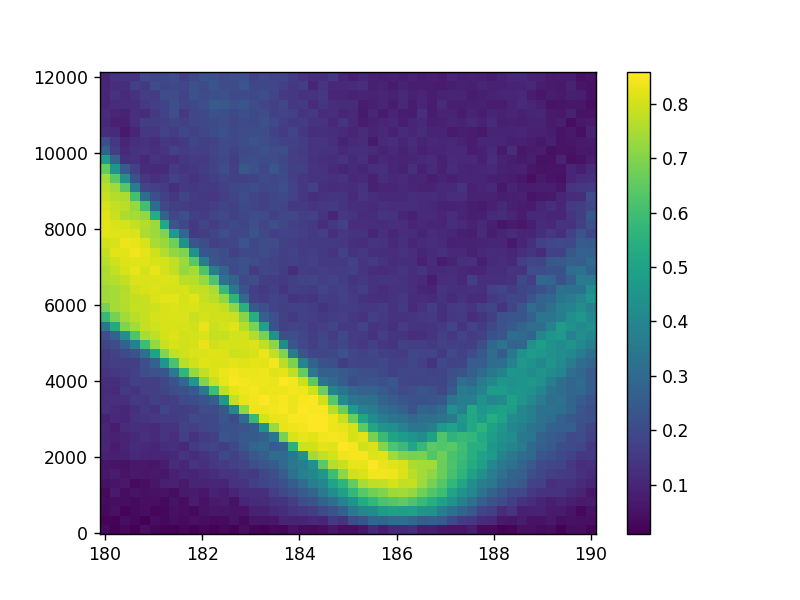

In [19]:
fig = plt.figure()
ax = fig.add_subplot()
ax_plot = ax.pcolormesh(freq, power, np.array(data[0]).T)
cbar = fig.colorbar(ax_plot)

In [22]:
np.max(data[0])

1

<IPython.core.display.Javascript object>


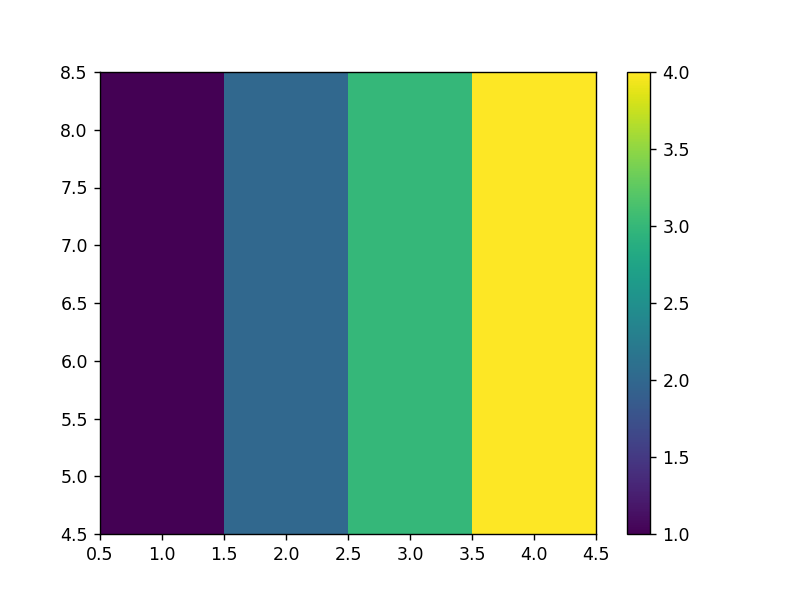

In [21]:
test1=[1,2,3,4]
test2=[5,6,7,8]
data=[[1,1,1,1], [2,2,2,2], [3,3,3,3], [4,4,4,4]]
fig = plt.figure()
ax = fig.add_subplot()
ax_plot = ax.pcolormesh(test1, test2, np.array(data).T)
cbar = fig.colorbar(ax_plot)

In [15]:
np.argmax(data[0])

916